<a href="https://colab.research.google.com/github/haldonmez/mnist-digit-recognizer/blob/main/Model_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn

import matplotlib.pyplot as plt

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Checking the PyTorch and torchvision versions.
print(f"Pytorch version: {torch.__version__}\ntorchvision version:{torchvision.__version__}")

Pytorch version: 2.3.0+cu121
torchvision version:0.18.0+cu121


In [2]:
# Setting a location for the data.
data = "/content/data"

# Setting up training and testing datas.
train_data = datasets.MNIST(
    root=data,
    train= True,
    transform=ToTensor(),
    download=True,
    target_transform=None
)

test_data = datasets.MNIST(
    root=data,
    train=False,
    transform=ToTensor(),
    download=True
)

In [3]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
import numpy as np

''' This functions takes the output of threshold calculation
    and a given image and outputs the image that Otsu's method
    has been applied to. '''

def threshold_image(im,th):
    thresholded_im = np.zeros(im.shape) # Adjusts the pixel intensities lower than th to 0.
    thresholded_im[im >= th] = 1 # Adjusts the pixel intensities higher than th to 1.
    return thresholded_im

This is normaltorch.float32
This is otsutorch.float32


Text(0.5, 1.0, '2')

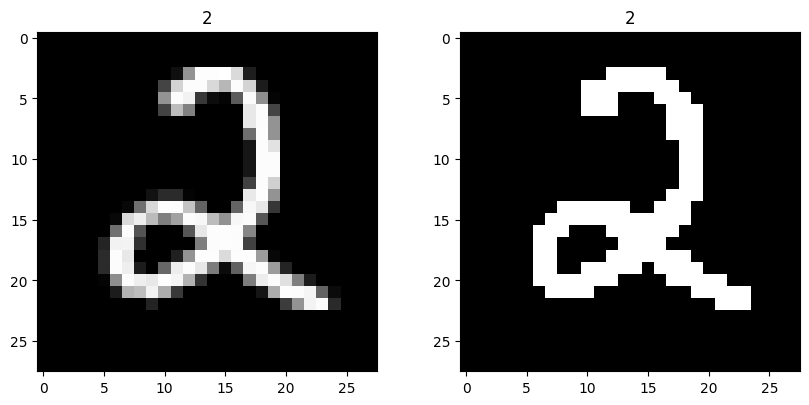

In [5]:
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import os
import numpy as np
import random

''' This block takes the training and testing datasets as
    an argument and saves them to assigned locations.
    By iterating through every single data in the datasets
    it applies Otsu's threshold method to all of them and
    creates a copy of the dataset in the location.        '''


train_dataset_path = '/content/data/MNIST/train-dataset.pt'
test_dataset_path = '/content/data/MNIST/test-dataset.pt'

if not os.path.exists(train_dataset_path and test_dataset_path):
  train_data_otsu2 = [(torch.tensor(threshold_image(image[0], 0.2611499991255095)).unsqueeze(0).float(), label) for image, label in train_data]
  torch.save(train_data_otsu2, train_dataset_path)
  test_data_otsu2 = [(torch.tensor(threshold_image(image[0], 0.2611499991255095)).unsqueeze(0).float(), label) for image, label in test_data]
  torch.save(train_data_otsu2, test_dataset_path)
else:
    # If the dataset already exists, load it
    train_data_otsu2 = torch.load(train_dataset_path)
    test_data_otsu2 = torch.load(test_dataset_path)

random_number = random.randint(0,len(train_data_otsu2))
image, label = train_data[random_number]
image2, label2 = train_data_otsu2[random_number]
image2.shape, image.shape
print(f"This is normal{train_data[0][0].dtype}")
print(f"This is otsu{train_data_otsu2[0][0].dtype}")
plt.figure(figsize=(10,15))
plt.subplot(321); plt.imshow(image.squeeze(),cmap='gray')
plt.title(label)
plt.subplot(322); plt.imshow(image2.squeeze(),cmap='gray')
plt.title(label2)


In [6]:
from torch.utils.data import DataLoader
from torch.utils.data import ConcatDataset

combined_train_data = ConcatDataset([train_data_otsu2, train_data])
combined_test_data = ConcatDataset([test_data_otsu2, test_data])
BATCH_SIZE = 16
train_dataloader = DataLoader(combined_train_data, #Dataset to iterate on for the according batch size.
                              batch_size = BATCH_SIZE, #Size of every single iteration.
                              shuffle = True, #To make the loaded data selected randomly.
                              )
test_dataloader = DataLoader(combined_test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = True)

print(f"For training data there is {len(train_dataloader)} iterations with the batch size of {BATCH_SIZE}.")
print(f"For testing data there is {len(test_dataloader)} iterations with the batch size of {BATCH_SIZE}.")

For training data there is 7500 iterations with the batch size of 16.
For testing data there is 4375 iterations with the batch size of 16.


In [7]:
len(train_data.classes)

10

In [8]:
import torch
from torch import nn
import torch.nn.functional as F

class LetterRecognizerModel4(nn.Module):
    def __init__(self, input_size, output_size):
        super(LetterRecognizerModel4, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(input_size, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.25),

            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.25),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2, 2),
            nn.Dropout(0.25)
        )

        self.fc_layers = nn.Sequential(
            nn.Linear(128*3*3, 512),
            #nn.BatchNorm4d(512),
            nn.Dropout(0.25),

            nn.Linear(512, 256),
            #nn.BatchNorm4d(256),
            nn.Dropout(0.25),

            nn.Linear(256, output_size)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)  # Flatten the output
        x = self.fc_layers(x)
        return x

torch.manual_seed(42)

model_4 = LetterRecognizerModel4(input_size=1, output_size=len(train_data.classes)).to(device)

model_4

LetterRecognizerModel4(
  (conv_layers): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Dropout(p=0.25, inplace=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (13): Dropout(p=0.25, inplace=False)
    (14): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU()
    (16): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1)

In [9]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(),
                             lr=0.0001)

In [10]:
def accuracy_func(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [11]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time
# Imported from learnpytorch.io directly...

In [12]:
def train_part(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_func,
               device: torch.device = device):
  train_loss, train_acc = 0 , 0
  model.to(device)

  for batch, (X,y) in enumerate(data_loader):
    X, y = X.to(device) , y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_func(y_true=y,
                               y_pred=y_pred.argmax(dim=1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss is:{train_loss:.5f}, Train accuracy is:{train_acc:.2f}%")
  return train_loss, train_acc

def test_part(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_func,
               device: torch.device = device):
  test_loss, test_acc = 0, 0
  model.to(device)
  model.eval()

  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)

      test_pred = model(X)
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_func(y_true=y,
                                y_pred = test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    print(f"Test loss is:{test_loss:.6f}, Test accuracy is:{test_acc:.6f}%")
  return test_loss, test_acc

In [14]:
from tqdm.auto import tqdm

torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_4 = timer()

train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

# Train and test model
epochs = 20
for epoch in tqdm(range(epochs)):

    train_loss, train_acc = train_part(data_loader=train_dataloader,
        model=model_4,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_func=accuracy_func,
        device=device)
    test_loss, test_acc = test_part(data_loader=test_dataloader,
        model=model_4,
        loss_fn=loss_fn,
        optimizer = optimizer,
        accuracy_func=accuracy_func,
        device=device)
    train_losses.append(train_loss.detach().cpu().numpy())
    train_accuracies.append(train_acc)
    test_losses.append(test_loss.detach().cpu().numpy())
    test_accuracies.append(test_acc)


    print(f"Epoch: {epoch}\n---------")

train_time_end_model_4 = timer()
total_train_time_model_4 = print_train_time(start=train_time_start_model_4,
                                           end=train_time_end_model_4,
                                           device=device)

  0%|          | 0/20 [00:00<?, ?it/s]

Train loss is:0.00745, Train accuracy is:99.80%
Test loss is:0.009800, Test accuracy is:99.701429%
Epoch: 0
---------
Train loss is:0.00686, Train accuracy is:99.83%
Test loss is:0.008738, Test accuracy is:99.760000%
Epoch: 1
---------
Train loss is:0.00606, Train accuracy is:99.85%
Test loss is:0.008368, Test accuracy is:99.794286%
Epoch: 2
---------
Train loss is:0.00542, Train accuracy is:99.88%
Test loss is:0.007851, Test accuracy is:99.781429%
Epoch: 3
---------
Train loss is:0.00488, Train accuracy is:99.89%
Test loss is:0.007126, Test accuracy is:99.825714%
Epoch: 4
---------
Train loss is:0.00440, Train accuracy is:99.91%
Test loss is:0.007105, Test accuracy is:99.812857%
Epoch: 5
---------
Train loss is:0.00394, Train accuracy is:99.93%
Test loss is:0.006878, Test accuracy is:99.827143%
Epoch: 6
---------
Train loss is:0.00352, Train accuracy is:99.94%
Test loss is:0.006481, Test accuracy is:99.847143%
Epoch: 7
---------
Train loss is:0.00318, Train accuracy is:99.94%
Test los